In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from datetime import datetime
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
import pytz
from pandas.tseries.offsets import Hour
from pandas.tseries.frequencies import to_offset

In [2]:
pv = pd.read_csv('PV_deseason_15_Dated')

In [3]:
array = np.arange(1,97)
print(array)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96]


In [4]:
def dayData(data, bus, freq, x, save):
    ##visualizes the x first days  and the x last days for the data frame data, bus bus, and of frequency of data collection freq.
    period  = pv.Period*freq 
    dates = pd.PeriodIndex(year=data.Year, month = data.Month,day = data.Day, minute = period, freq = "T")
    
    data['Date'] = dates
    new_data  = data.groupby('Date').sum()
    #new_data = new_data.rolling(3).mean().loc[new_data.index.minute.isin([0, 15, 30, 45])]
        
    
    
     
    
    
    return new_data

In [5]:
new_pv = dayData(pv, '310_PV_1',5, 24000, False)
new_pv = new_pv.rolling(3).mean().loc[new_pv.index.minute.isin([0, 15, 30, 45])]

##daily periods
array = np.arange(1.0,97.0)
array2 = np.arange(1.0,97.0)
for i in range(365):
    array = np.append(array,array2)

frame2 = pd.DataFrame({'Period':array})
frame2['Date'] =  new_pv.index
frame2 = frame2.set_index('Date')
print(frame2)
new_pv['Period'] = frame2['Period']


#day number 

array = np.repeat(1,96)

for i in range(365):
    array2 = np.repeat(i+2, 96)
    array = np.append(array,array2)

print(len(array))

frame2 = pd.DataFrame({'#Day':array})
frame2['Date'] =  new_pv.index
frame2 = frame2.set_index('Date')
new_pv['#Day'] = frame2['#Day']
print(new_pv)

                  Period
Date                    
2020-01-01 00:15     1.0
2020-01-01 00:30     2.0
2020-01-01 00:45     3.0
2020-01-01 01:00     4.0
2020-01-01 01:15     5.0
...                  ...
2020-12-31 23:00    92.0
2020-12-31 23:15    93.0
2020-12-31 23:30    94.0
2020-12-31 23:45    95.0
2021-01-01 00:00    96.0

[35136 rows x 1 columns]
35136
                  320_PV_1  314_PV_1  314_PV_2  313_PV_1  314_PV_3  314_PV_4  \
Date                                                                           
2020-01-01 00:15       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-01 00:30       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-01 00:45  3.966107  3.980367  4.282545  7.275664  6.894732  4.207236   
2020-01-01 01:00  3.965761  3.979998  4.282108  7.275137  6.894181  4.206830   
2020-01-01 01:15  3.965415  3.979628  4.281671  7.274609  6.893630  4.206423   
...                    ...       ...       ...       ...       ...       ...   
202

In [6]:
##create palette based on month
colors = ['#b32e2e', '#fcba03', '#6fc924', '#054705', '#1dd1b3', '#1d77d1', '#24135e', '#b72fed', 
          '#510370', '#d117be', '#f59aec', '#fa6b75']
result = []

months = 1
for col in colors:
    for i in range(len(new_pv[new_pv.index.month == months]['#Day'].unique())):
        result.append(col)
    months+=1
    
palette = sns.color_palette(result)
    


C:\Users\bvits\AppData\Local\Temp\ipykernel_16996\1820379604.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 1 ]['Period'], y=new_pv[new_pv.index.month == 1 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 1 ]['Day'],ci=None)


Text(0, 0.5, 'Photovoltaic generation')

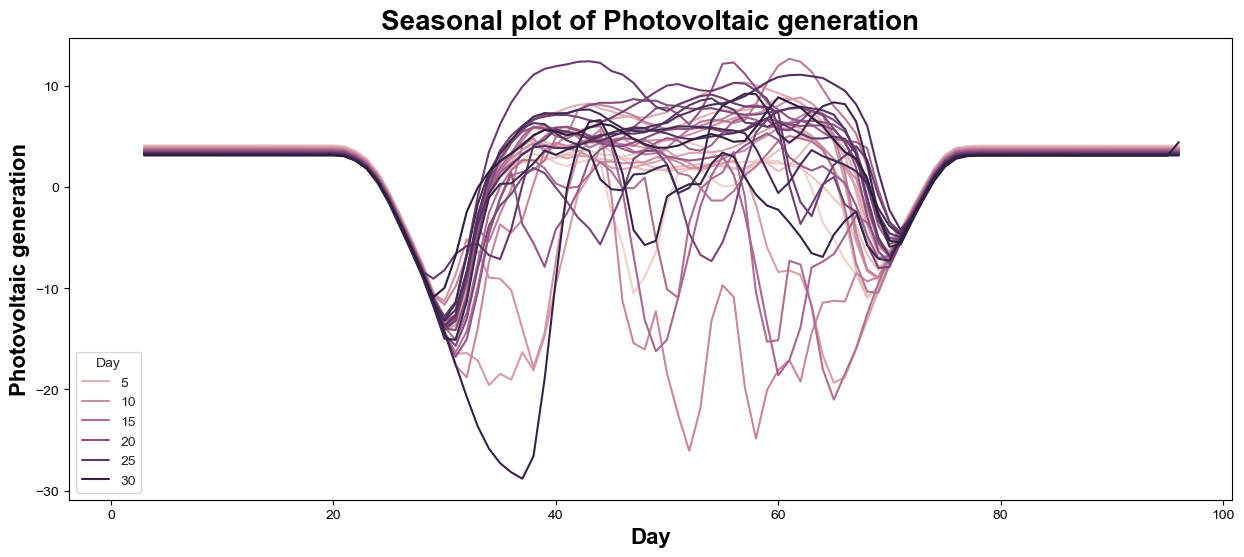

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 1 ]['Period'], y=new_pv[new_pv.index.month == 1 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 1 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Photovoltaic generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Photovoltaic generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_16996\1588523471.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 2 ]['Period'], y=new_pv[new_pv.index.month == 2 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 2 ]['Day'],ci=None)


Text(0, 0.5, 'Photovoltaic generation')

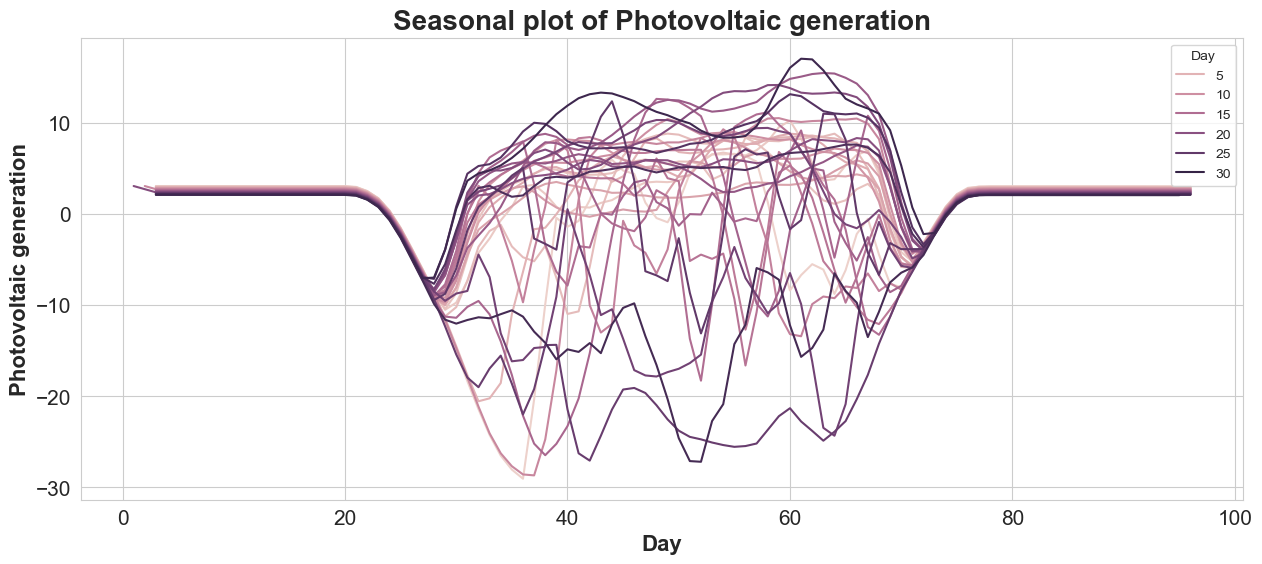

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 2 ]['Period'], y=new_pv[new_pv.index.month == 2 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 2 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Photovoltaic generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Photovoltaic generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_16996\3283434756.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 3 ]['Period'], y=new_pv[new_pv.index.month == 3 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 3 ]['Day'],ci=None)


Text(0, 0.5, 'Photovoltaic generation')

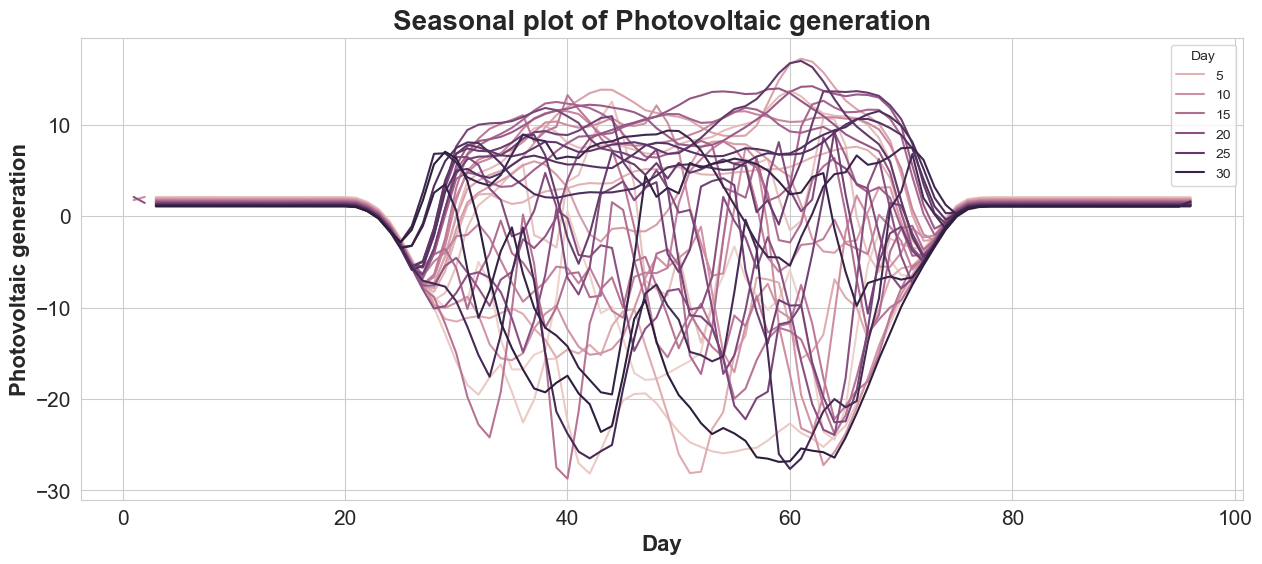

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 3 ]['Period'], y=new_pv[new_pv.index.month == 3 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 3 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Photovoltaic generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Photovoltaic generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_16996\3950778860.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 4 ]['Period'], y=new_pv[new_pv.index.month == 4 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 4 ]['Day'],ci=None)


Text(0, 0.5, 'Photovoltaic generation')

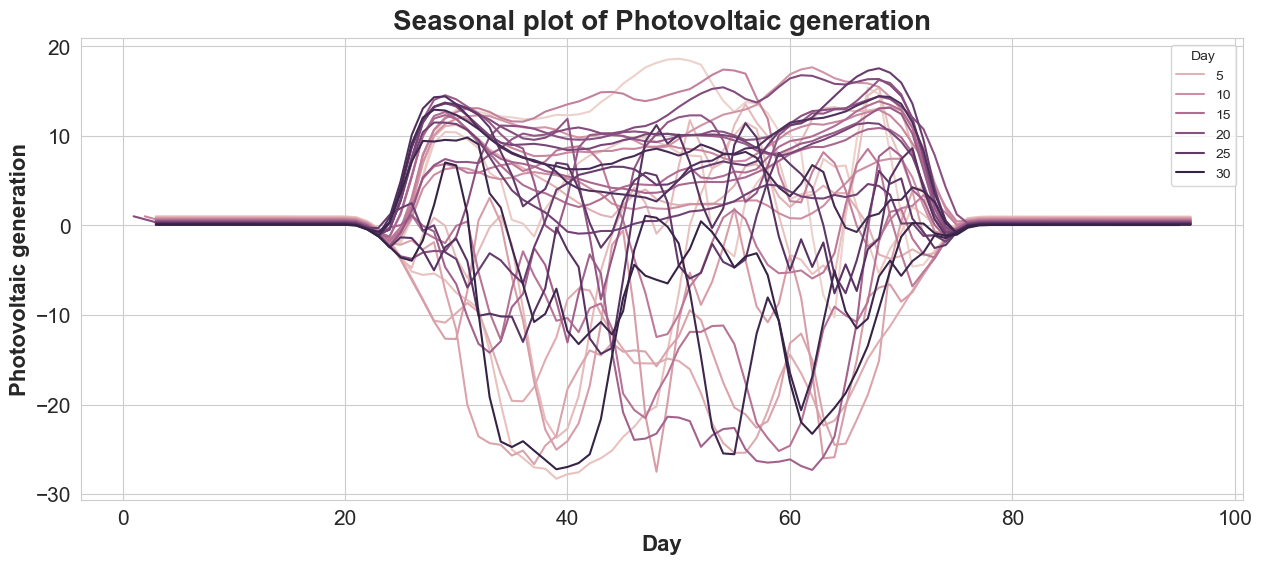

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 4 ]['Period'], y=new_pv[new_pv.index.month == 4 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 4 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Photovoltaic generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Photovoltaic generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_16996\2392327261.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 5 ]['Period'], y=new_pv[new_pv.index.month == 5 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 5 ]['Day'],ci=None)


Text(0, 0.5, 'Photovoltaic generation')

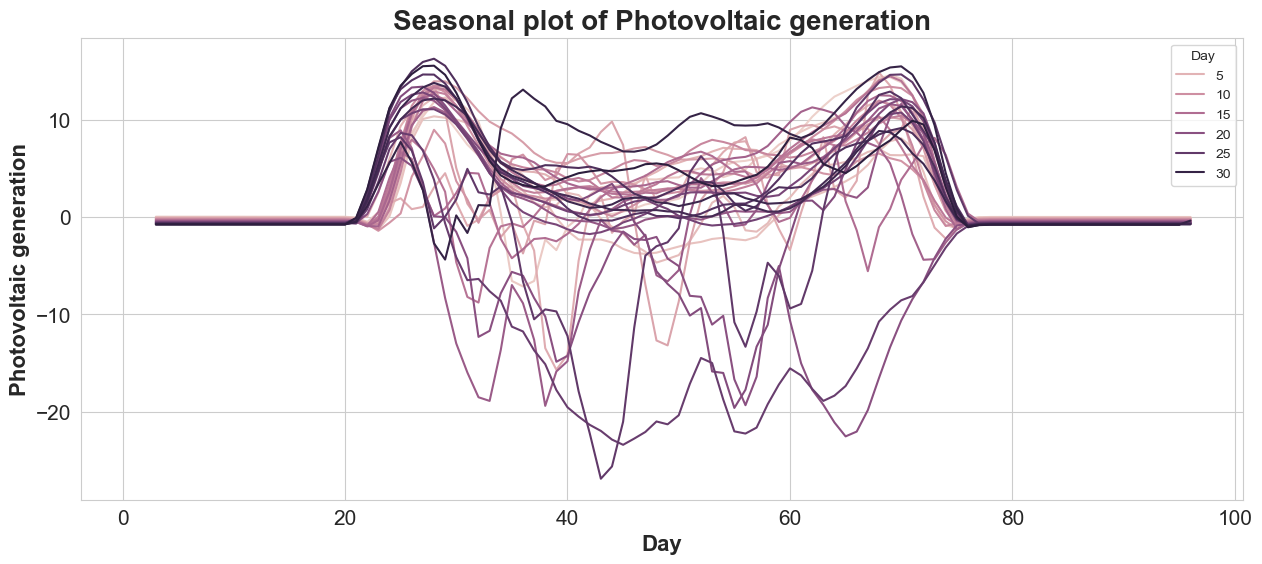

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 5 ]['Period'], y=new_pv[new_pv.index.month == 5 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 5 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Photovoltaic generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Photovoltaic generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_16996\446290522.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 6 ]['Period'], y=new_pv[new_pv.index.month == 6 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 6 ]['Day'],ci=None)


Text(0, 0.5, 'Photovoltaic generation')

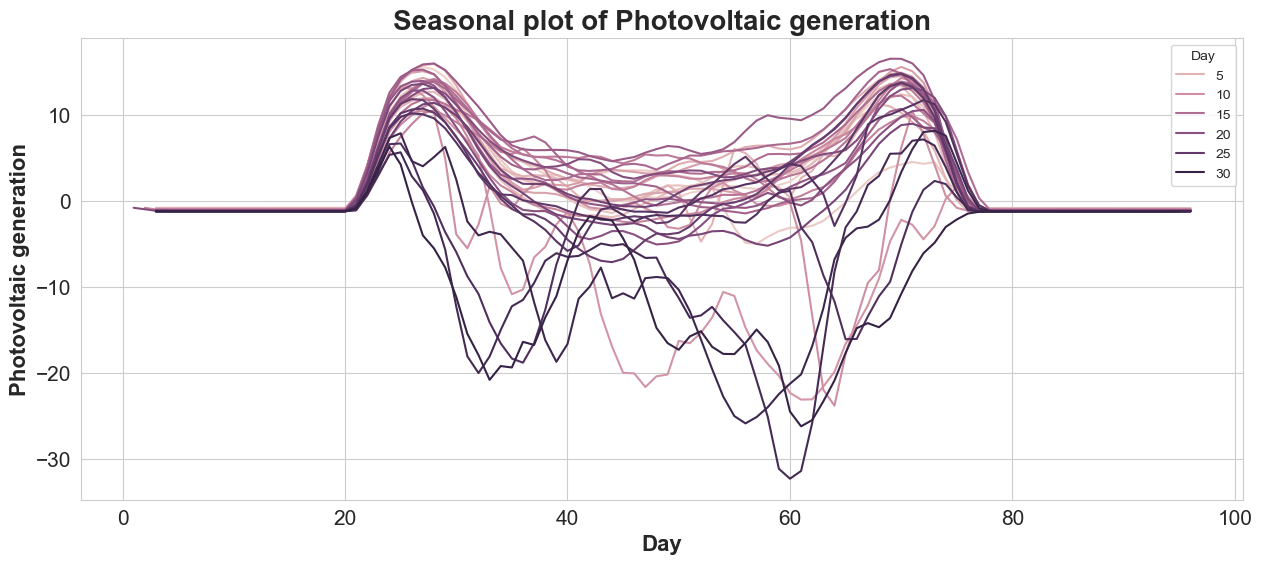

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 6 ]['Period'], y=new_pv[new_pv.index.month == 6 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 6 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Photovoltaic generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Photovoltaic generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_16996\3599818387.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 7 ]['Period'], y=new_pv[new_pv.index.month == 7 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 7 ]['Day'],ci=None)


Text(0, 0.5, 'Photovoltaic generation')

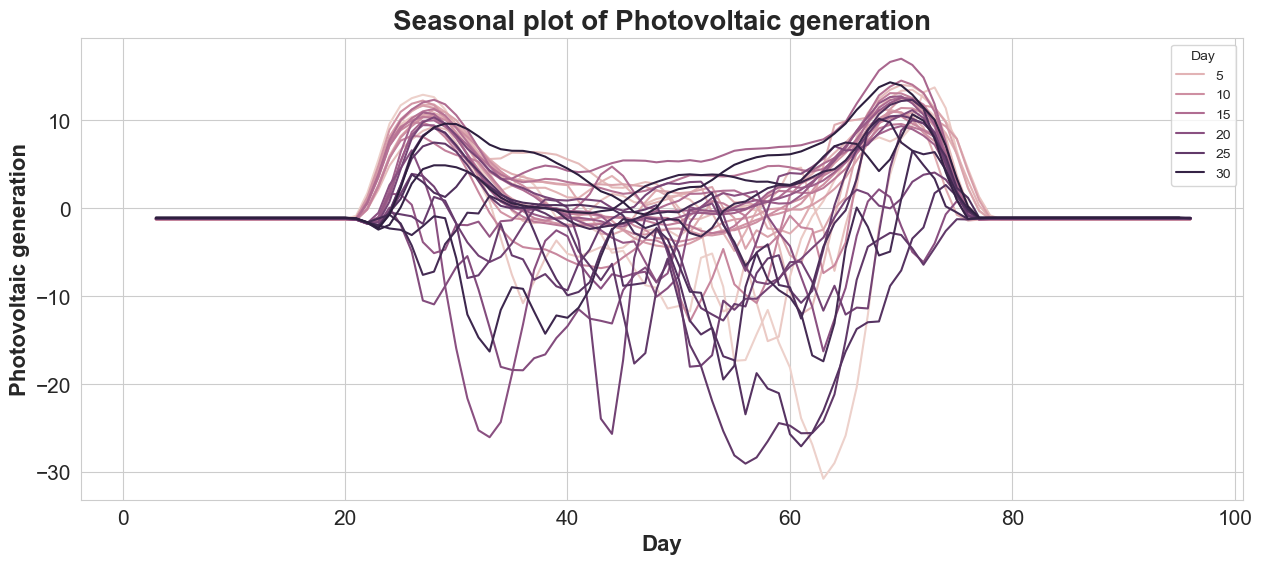

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 7 ]['Period'], y=new_pv[new_pv.index.month == 7 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 7 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Photovoltaic generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Photovoltaic generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_16996\781372372.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 8 ]['Period'], y=new_pv[new_pv.index.month == 8 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 8 ]['Day'],ci=None)


Text(0, 0.5, 'Photovoltaic generation')

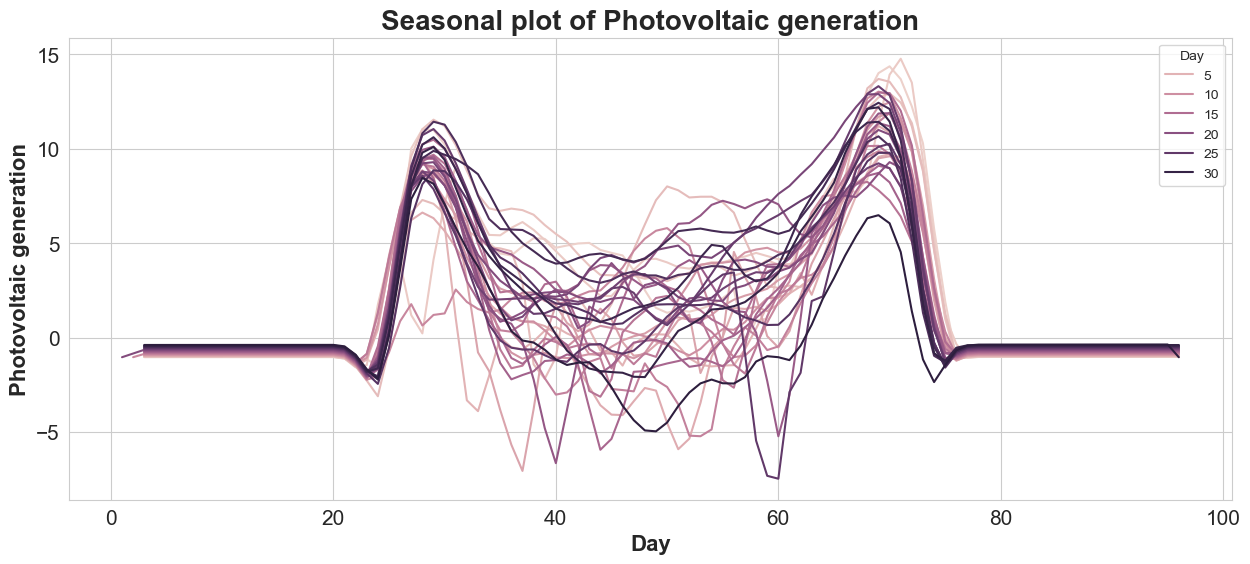

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 8 ]['Period'], y=new_pv[new_pv.index.month == 8 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 8 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Photovoltaic generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Photovoltaic generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_16996\1188684248.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 9 ]['Period'], y=new_pv[new_pv.index.month == 9 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 9 ]['Day'],ci=None)


Text(0, 0.5, 'Photovoltaic generation')

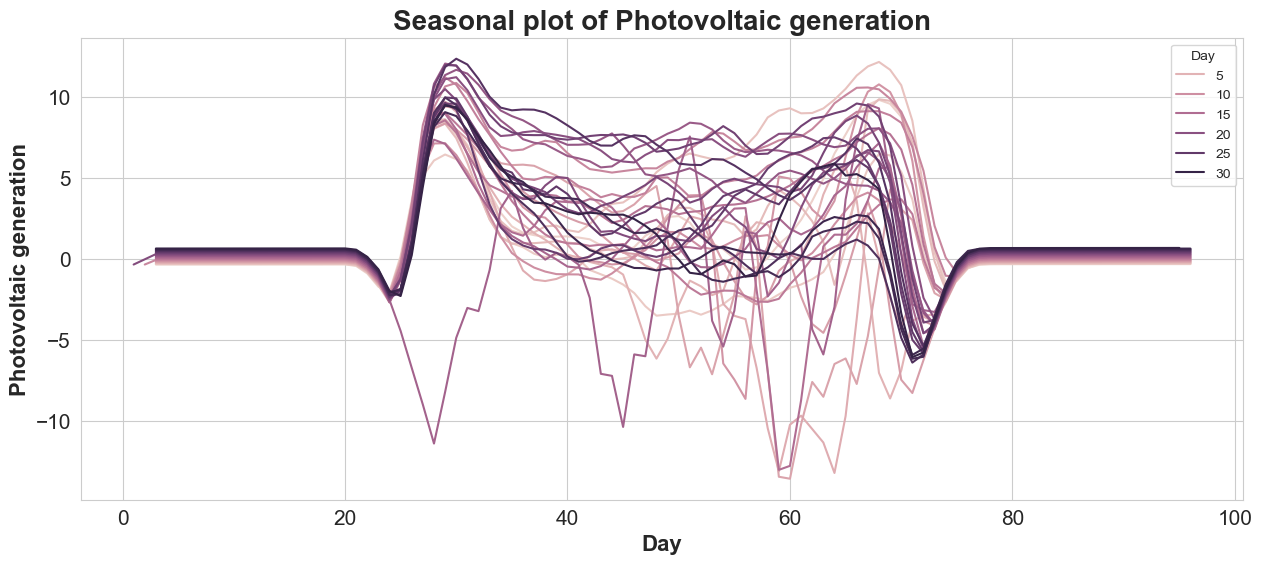

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 9 ]['Period'], y=new_pv[new_pv.index.month == 9 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 9 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Photovoltaic generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Photovoltaic generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_16996\1114297160.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 10 ]['Period'], y=new_pv[new_pv.index.month == 10 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 10 ]['Day'],ci=None)


Text(0, 0.5, 'Photovoltaic generation')

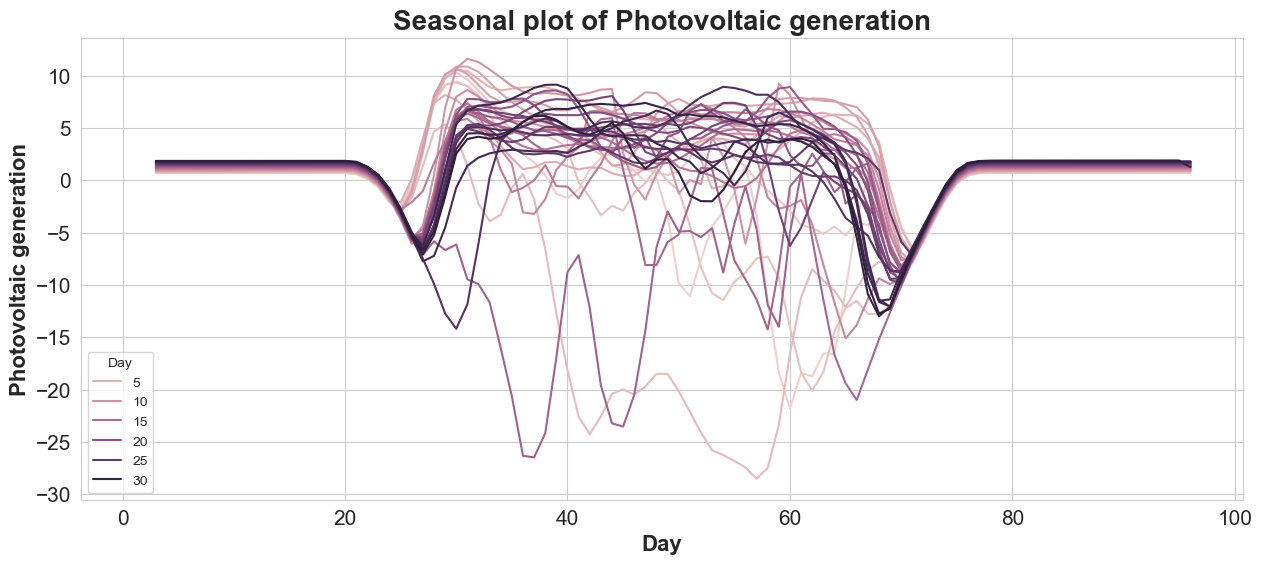

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 10 ]['Period'], y=new_pv[new_pv.index.month == 10 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 10 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Photovoltaic generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Photovoltaic generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_16996\1150669322.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 11 ]['Period'], y=new_pv[new_pv.index.month == 11 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 11 ]['Day'],ci=None)


Text(0, 0.5, 'Photovoltaic generation')

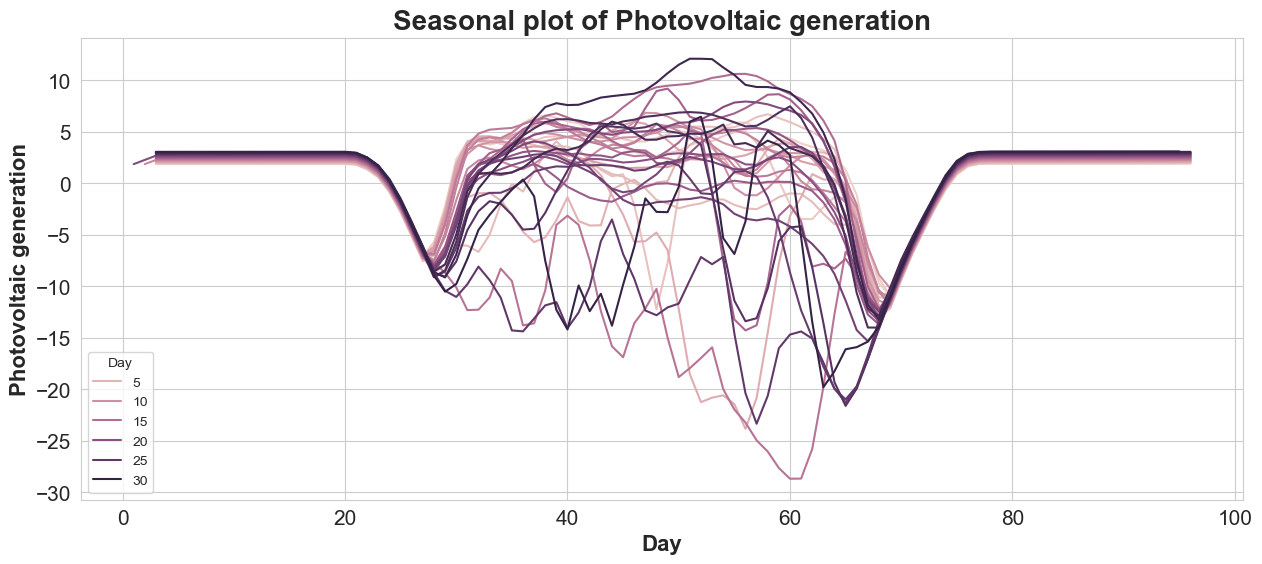

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 11 ]['Period'], y=new_pv[new_pv.index.month == 11 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 11 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Photovoltaic generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Photovoltaic generation', fontsize = 16, fontdict=dict(weight='bold'))

C:\Users\bvits\AppData\Local\Temp\ipykernel_16996\4141074936.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=new_pv[new_pv.index.month == 12 ]['Period'], y=new_pv[new_pv.index.month == 12 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 12 ]['Day'],ci=None)


Text(0, 0.5, 'Photovoltaic generation')

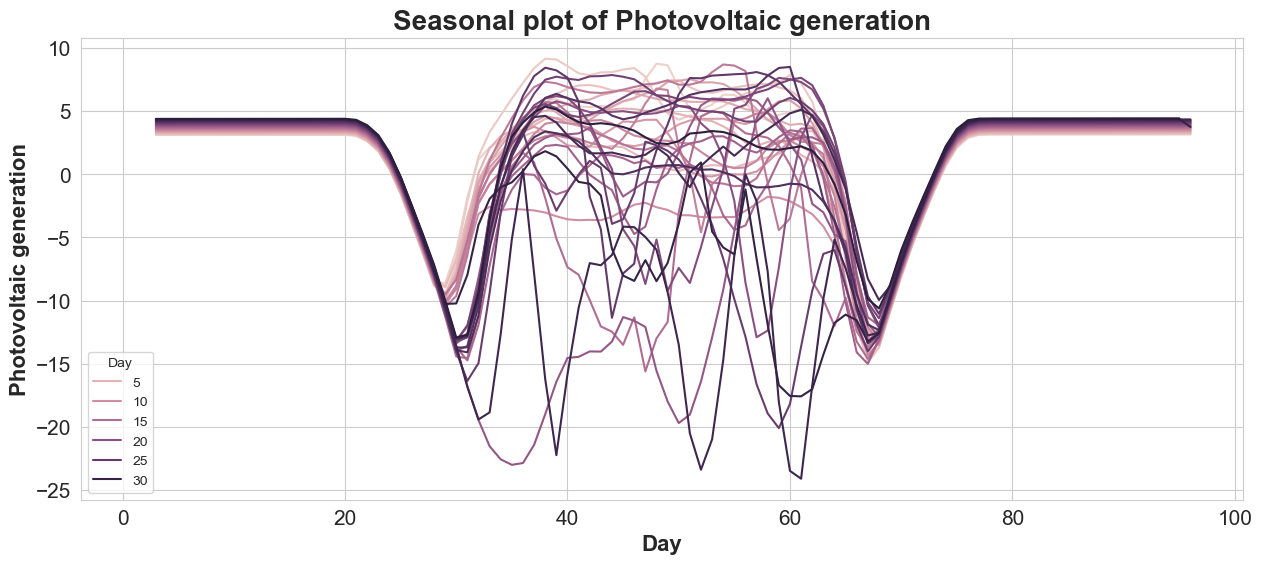

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))



sns.set_style("whitegrid")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

sns.lineplot(x=new_pv[new_pv.index.month == 12 ]['Period'], y=new_pv[new_pv.index.month == 12 ]['310_PV_1'], hue=new_pv[new_pv.index.month == 12 ]['Day'],ci=None)
ax.set_title('Seasonal plot of Photovoltaic generation', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Photovoltaic generation', fontsize = 16, fontdict=dict(weight='bold'))